## India - Budget Speech Analysis

### Text cleanup helper function

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhaval_patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

review_to_words method performs following tasks:
1. Remove HTML tags
2. Convert all text to lower case
3. Split string into words
4. Remove stopwords - such as “the”, “a”, “an”, “in”
5. Apply Stemming & Lemmatization - to remove morphological affixes from words. For ex. stemming for root word "like" includes, "likes", "liked", "likely", "liking", etc...

In [3]:
#Stemming is a method of normalization of words in Natural Language Processing. It is a technique in which a set of words in a sentence are converted into a sequence to shorten its lookup.
# stem = “eat” = variationseats, eating, eaten, etc.
#Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word known as the lemma.

def review_to_words(review):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()
    
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words - #nltk.word_tokenize
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    #words = [PorterStemmer().stem(w) for w in words] # stem = “eat” = variationseats, eating, eaten, etc.
    words = [wordnet_lemmatizer.lemmatize(w) for w in words]
    
    return words

### Read the input file

In [4]:
with open('budget_speech2023-24.txt', "r", encoding ="utf8") as current_file:
    text = current_file.read()
    text = text.replace("\n", "").replace("\r", "")

text

'Page # 1 GOVERNMENT OF INDIABUDGET 2023-2024SPEECHOFNIRMALA SITHARAMANMINISTER OF FINANCEFebruary 1, 2023 \x0cPage # 2\x0cPage # 3CONTENTS    PART-APage No.e Introduction 1e Achievements since 2014: Leaving no one behind 2e Vision for Amrit Kaal — an empowered and inclusive economy 3e Priorities of this Budget 5i. Inclusive Developmentii. Reaching the Last Mileiii. Infrastructure and Investmentiv. Unleashing the Potentialv. Green Growthvi. Youth Powervii. Financial Sectore Fiscal Management 24PART BIndirect Taxes 27e Green Mobilitye Electronicse Electricale Chemicals and Petrochemicalse = Marine productse Lab Grown Diamondse Precious Metalse =Metalse Compounded Rubbere = CigarettesDirect Taxes 30e MSMEs and Professionalse Cooperatione = Start-Upse =Appealse Better targeting of tax concessionse — Rationalisatione Otherse Personal Income TaxAnnexures 35e Annexure to Part B of the Budget Speech 2023-24i. Amendments relating to Direct Taxesii, Amendments relating to Indirect Taxes\x0cPage

In [5]:
# Getting clean list of words from the text
word_list = review_to_words(text)
word_list

['page',
 '1',
 'government',
 'indiabudget',
 '2023',
 '2024speechofnirmala',
 'sitharamanminister',
 'financefebruary',
 '1',
 '2023',
 'page',
 '2',
 'page',
 '3contents',
 'part',
 'apage',
 'e',
 'introduction',
 '1e',
 'achievement',
 'since',
 '2014',
 'leaving',
 'one',
 'behind',
 '2e',
 'vision',
 'amrit',
 'kaal',
 'empowered',
 'inclusive',
 'economy',
 '3e',
 'priority',
 'budget',
 '5i',
 'inclusive',
 'developmentii',
 'reaching',
 'last',
 'mileiii',
 'infrastructure',
 'investmentiv',
 'unleashing',
 'potentialv',
 'green',
 'growthvi',
 'youth',
 'powervii',
 'financial',
 'sectore',
 'fiscal',
 'management',
 '24part',
 'bindirect',
 'tax',
 '27e',
 'green',
 'mobilitye',
 'electronicse',
 'electricale',
 'chemical',
 'petrochemicalse',
 'marine',
 'productse',
 'lab',
 'grown',
 'diamondse',
 'precious',
 'metalse',
 'metalse',
 'compounded',
 'rubbere',
 'cigarettesdirect',
 'tax',
 '30e',
 'msmes',
 'professionalse',
 'cooperatione',
 'start',
 'upse',
 'appealse'

In [6]:
# Check the most frequently used words
import pandas as pd
pd.Index(word_list).value_counts()[:50]

tax               85
proposed          80
per               78
cent              73
crore             69
lakh              61
page              58
2                 54
income            53
5                 53
act               52
year              51
also              41
e                 40
000               40
section           38
new               36
provide           34
3                 33
rate              32
duty              32
financial         31
development       30
2023              30
regime            28
1                 28
government        28
india             27
time              26
scheme            26
state             26
custom            25
certain           25
15                24
capital           23
co                23
green             23
part              22
limit             22
infrastructure    22
10                21
exemption         20
sw                20
7                 20
one               19
service           19
nil               18
return       

In [7]:
# Remove insignificat words from the list
customStopwords = ['per','cent','year','5','23','also','2','000','3','2023','b','part','co','7','10','sw','15','e','1','one','shall','page','30','made','non','4','pm','set','propose','order','20']
word_list = [w for w in word_list if w not in customStopwords]

In [8]:
# Merge all the words to string

text = ' '.join(word_list) 
text

'government indiabudget 2024speechofnirmala sitharamanminister financefebruary 3contents apage introduction 1e achievement since 2014 leaving behind 2e vision amrit kaal empowered inclusive economy 3e priority budget 5i inclusive developmentii reaching last mileiii infrastructure investmentiv unleashing potentialv green growthvi youth powervii financial sectore fiscal management 24part bindirect tax 27e green mobilitye electronicse electricale chemical petrochemicalse marine productse lab grown diamondse precious metalse metalse compounded rubbere cigarettesdirect tax 30e msmes professionalse cooperatione start upse appealse better targeting tax concessionse rationalisatione otherse personal income taxannexures 35e annexure budget speech 24i amendment relating direct taxesii amendment relating indirect tax 5budget 2024speech ofnirmala sitharamanminister financefebruary 2023hon ble speaker present budget 24 first budget amritkaal introduction1 budget hope build foundation laid previousb

### Create Word Cloud


#### Rupee shape word cloud

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

#stopwords = set(STOPWORDS)

In [10]:
rupee_mask = np.array(Image.open('Rupee.png'))

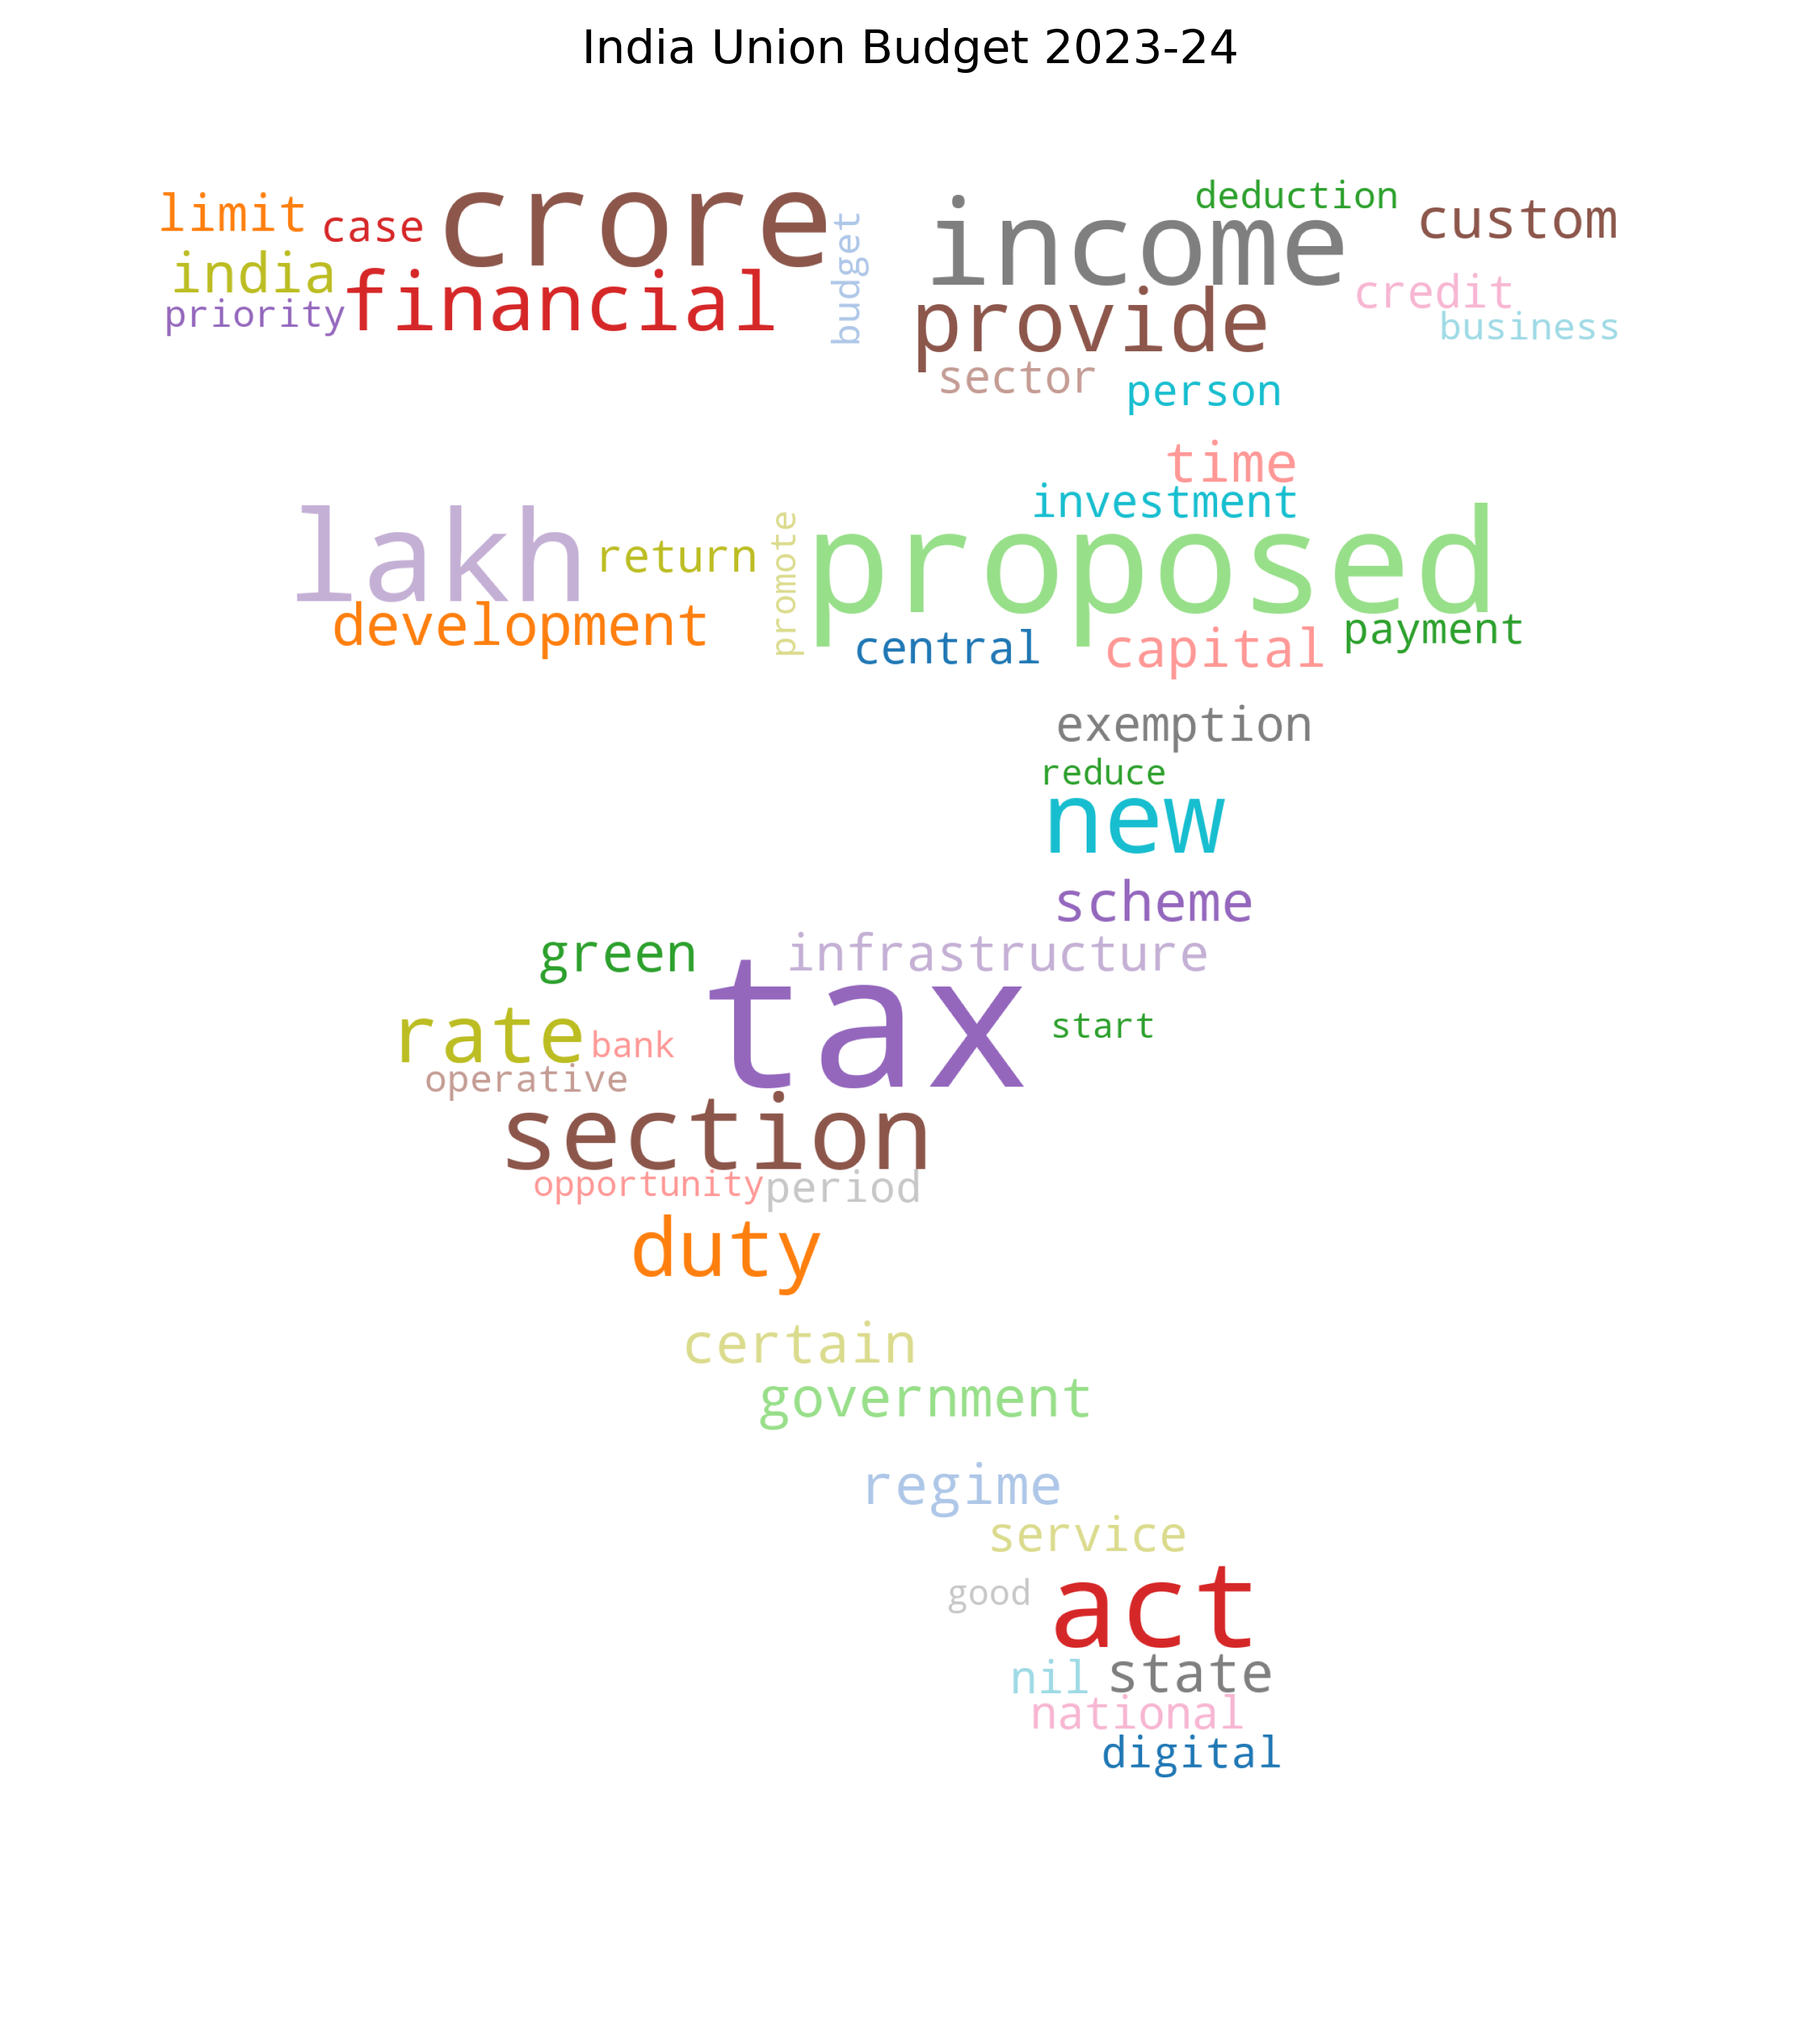

In [11]:
wordcloud1 = WordCloud(scale=3,
                       max_words=50,
                       #colormap=,
                       colormap='tab20', #'RdYlGn', 'tab20b', 'tab20c', 'tab10', 'tab20', 'Set2', 'Set3'
                       mask=rupee_mask,
                       background_color='white',
                       #stopwords=stopwords,
                       collocations=False).generate(text)

plt.figure(figsize=(16,9), dpi=400)
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('India Union Budget 2023-24')
plt.show()

### Standard rectangle shape word cloud

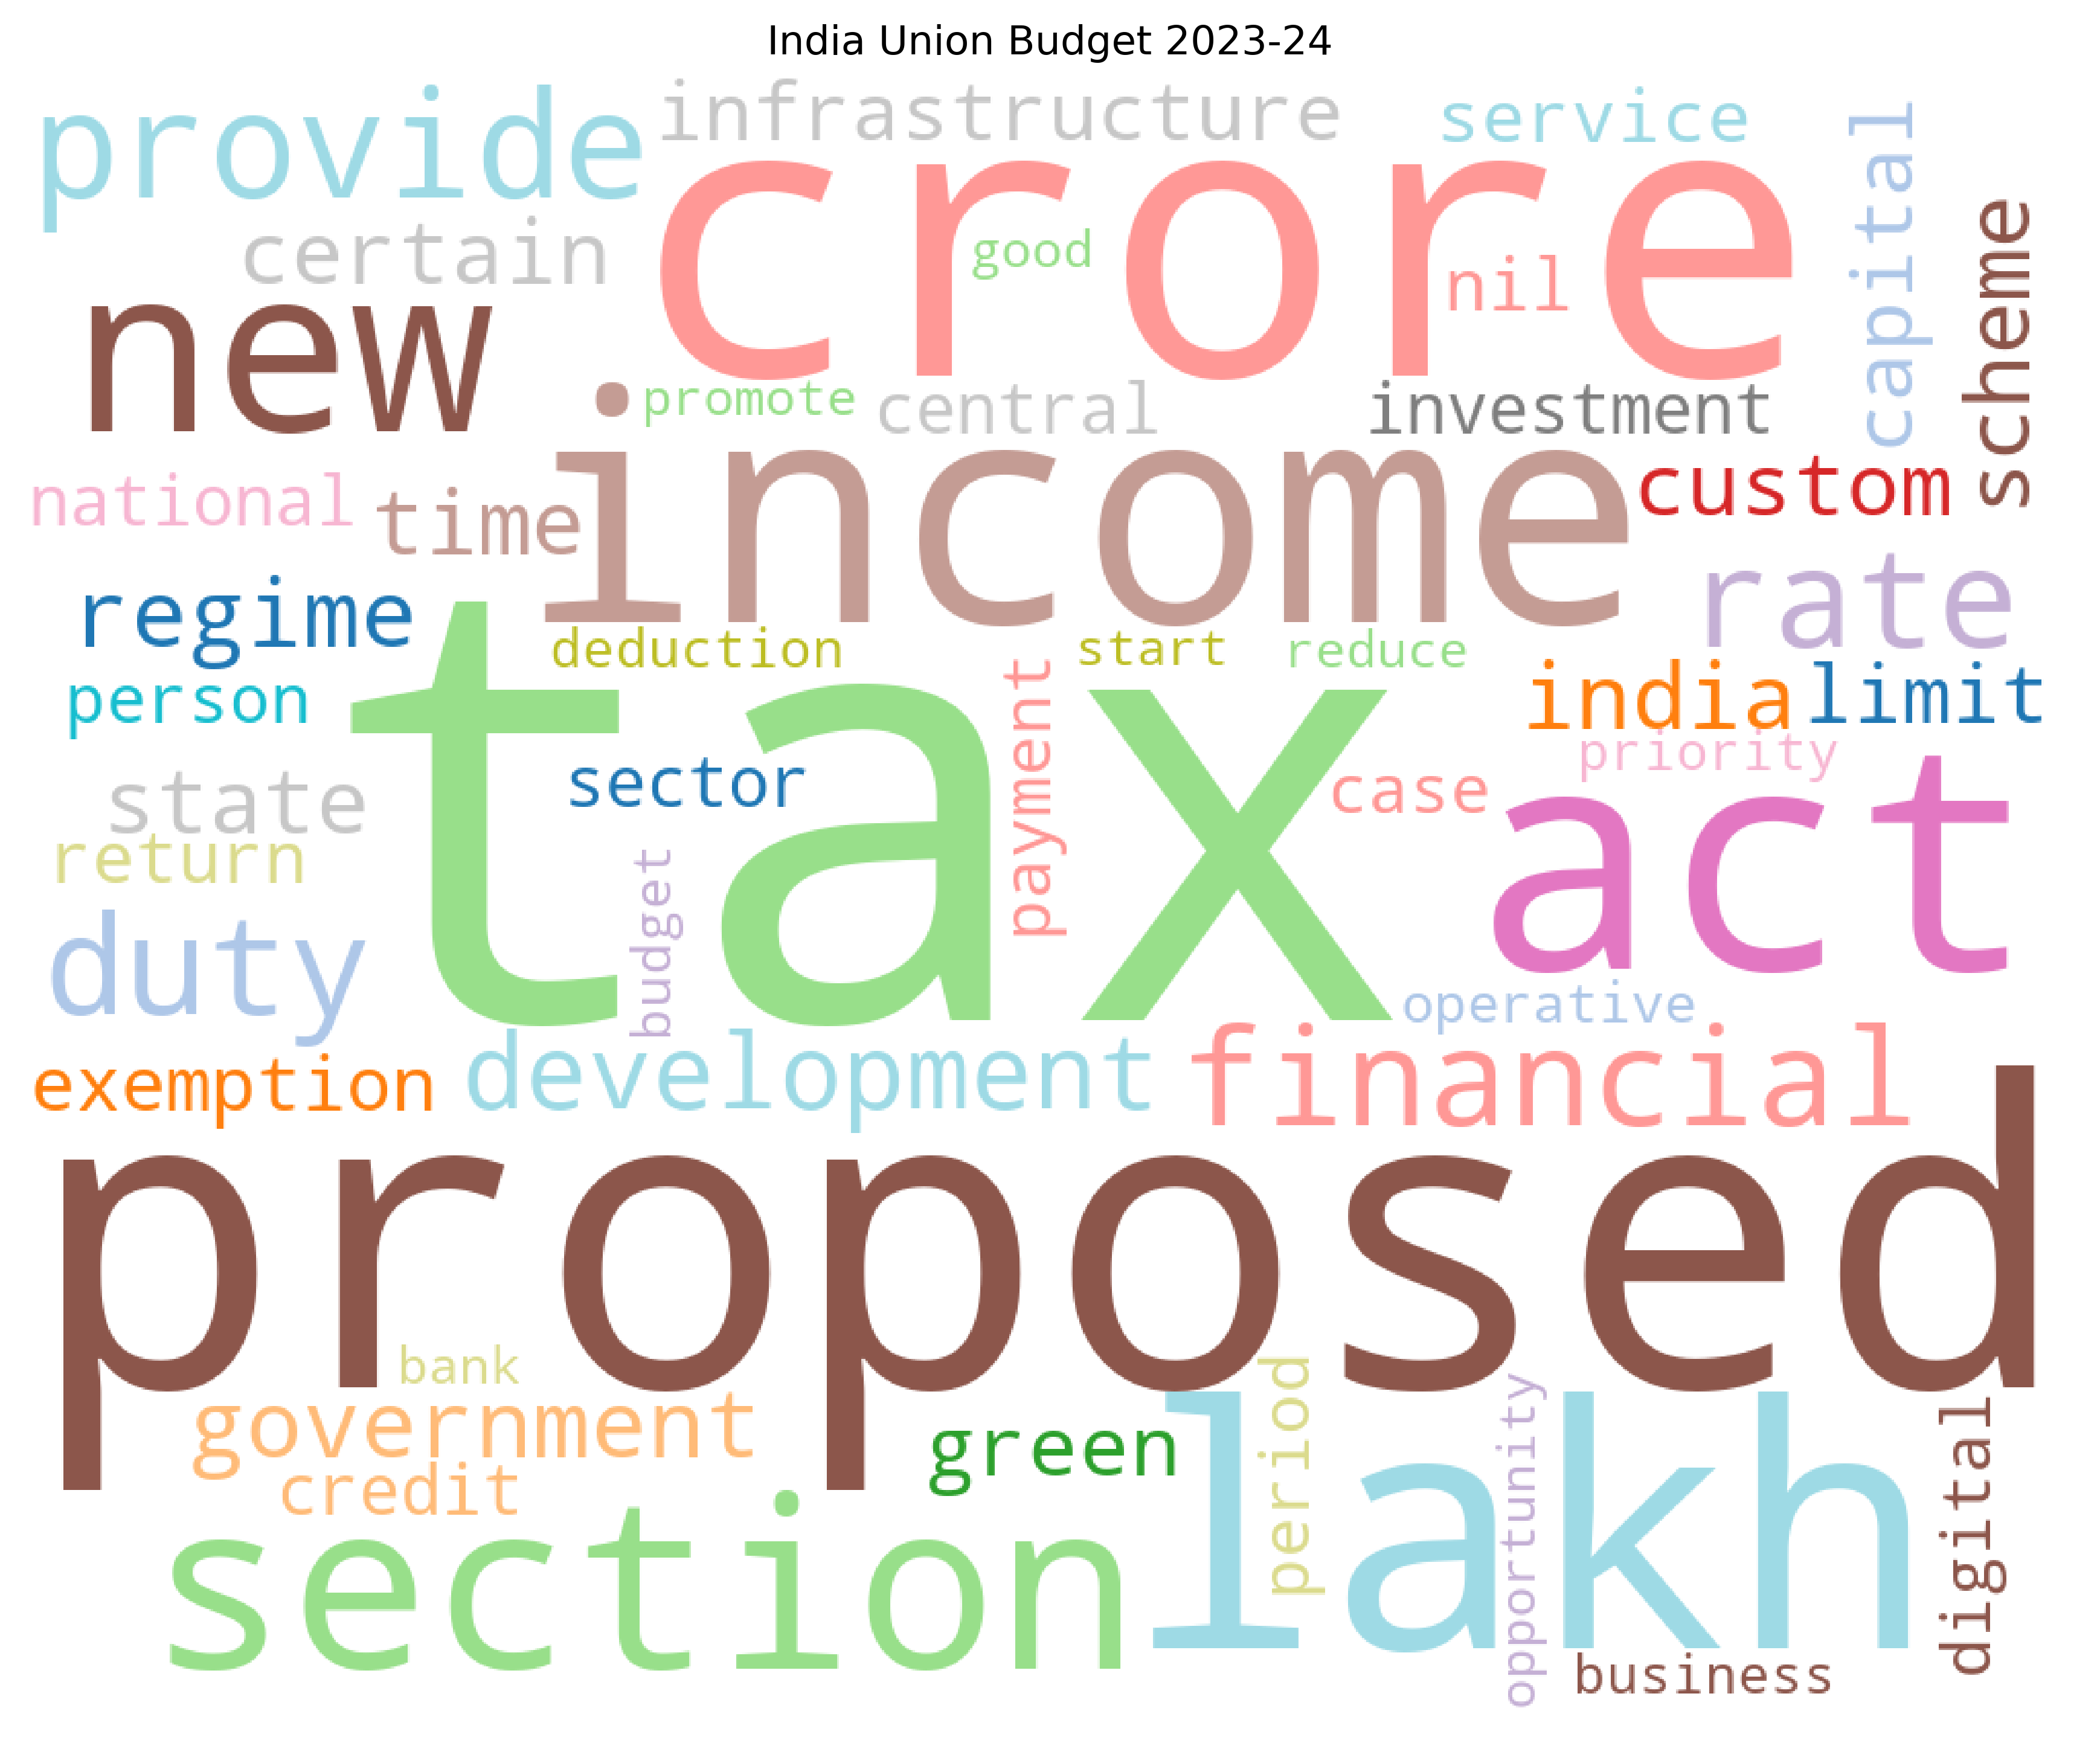

In [12]:
wordcloud2 = WordCloud(width = 1000, height = 800,
                       max_words=50,
                       colormap='tab20', #'RdYlGn', 'tab20b', 'tab20c', 'tab10', 'tab20', 'Set2', 'Set3'
                       background_color="white",
                       collocations = False).generate(text)

plt.figure(figsize=(16,9), dpi=400)
plt.imshow(wordcloud2)
plt.axis("off")
plt.title('India Union Budget 2023-24')
plt.show()